Clustering is a technique for partitioning data into distinct groups.  We are looking for two things:
1. for data points that are in the cluster, we want them to be similar
2. for data points that are not in the same cluster, we want them to be different

I am going to be going over 2 techniques for clustering - K-Means Clustering and Hierarchial Clustering. 

### K-Means Clustering 

K-Means Clustering has 6 steps:
1. Select a number of clusters (k).  This is the number of clusters you want in the dataset 
2. Randomly assign a data point each of the clusters (this is our initial centroid)
3. Assign each data point to a cluster 
4. Compute the centroid of each cluster 
5. Update our centroid
6. Repeat steps 3 through 5 until the centroid no longer changes<br>

An example of this can be seen below 

![](K-means_convergence.gif)
[source](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)

Another representation can be seen here

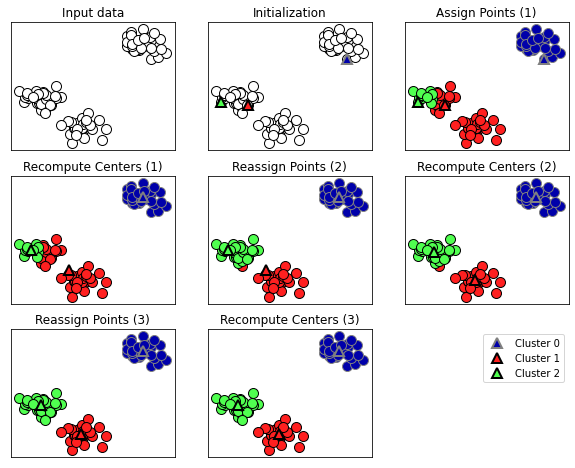

In [6]:
import mglearn
import matplotlib.pyplot as plt 

mglearn.plots.plot_kmeans_algorithm()
plt.show()

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 4, random_state = 11)

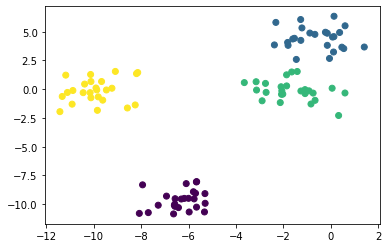

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = y);

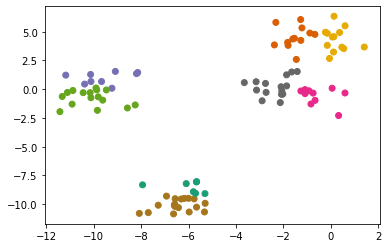

In [25]:
from sklearn.cluster import KMeans

km = KMeans()
km.fit(X)
preds = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = preds, cmap = 'Dark2');

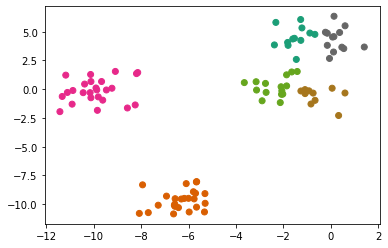

In [26]:
km = KMeans(n_clusters=6)
km.fit(X)
preds = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = preds, cmap = 'Dark2');

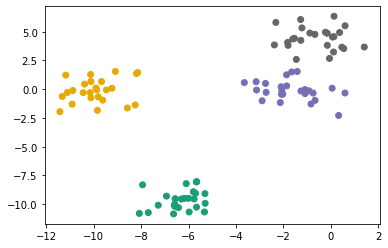

In [28]:
km = KMeans(n_clusters=4)
km.fit(X)
preds = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = preds, cmap = 'Dark2');

How do we know what is the optimal number of clusters to use? One technique is silhouette score. Silhouette score measures how similar the values in the cluster vs how similar the values are outside of the cluster. Silhouette score can be between -1 and 1. A score of 1 indicates the data points inside the cluster are very similar and datapoints in different clusters are very different.

In [29]:
from sklearn.metrics import silhouette_score

In [32]:
for i in [4, 6, 8]:
    km = KMeans(n_clusters=i)
    km.fit(X)
    preds = km.predict(X)
    print(f'k-clusters {i} - silhouette score {silhouette_score(X, preds)}')

k-clusters 4 - silhouette score 0.7212069599861423
k-clusters 6 - silhouette score 0.5998602159737816
k-clusters 8 - silhouette score 0.5004682430061751


For n_clusters = 2 The average silhouette_score is : 0.5668562661936669
For n_clusters = 3 The average silhouette_score is : 0.7315502860808357
For n_clusters = 4 The average silhouette_score is : 0.7212069599861423
For n_clusters = 5 The average silhouette_score is : 0.6568705510301445
For n_clusters = 6 The average silhouette_score is : 0.5411653592392213


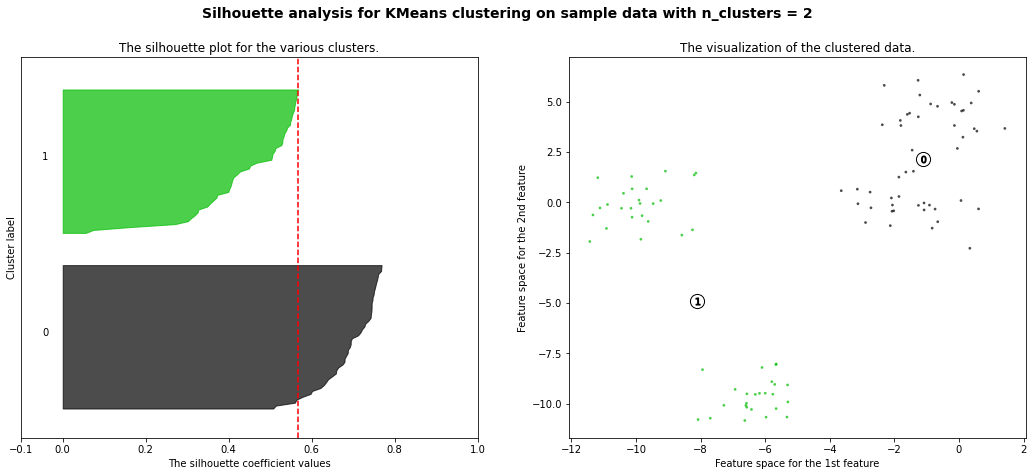

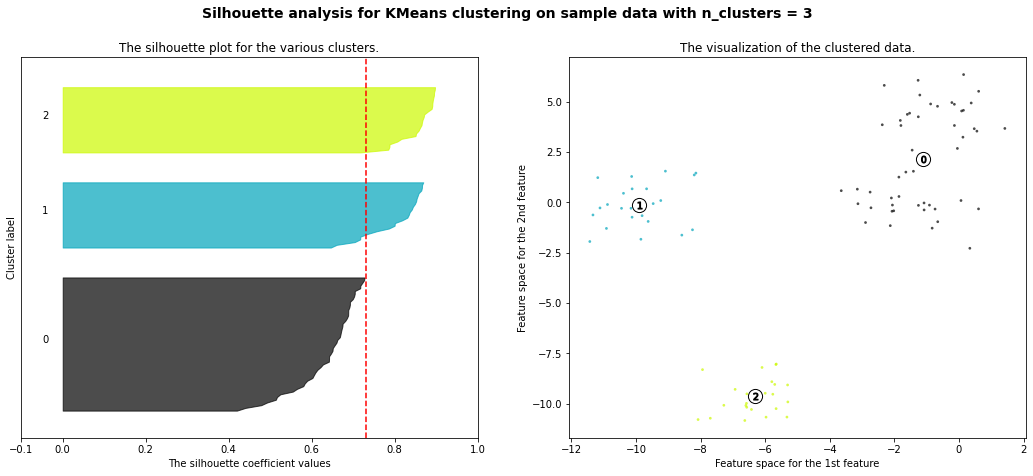

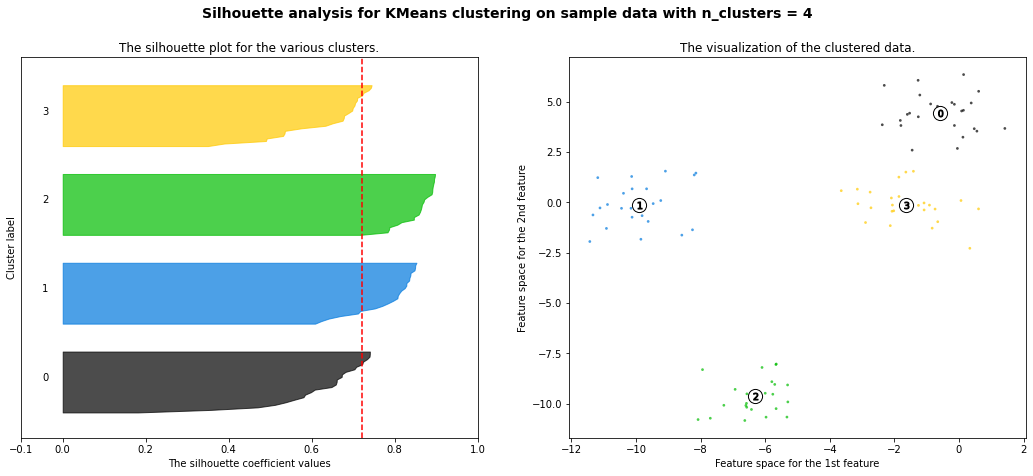

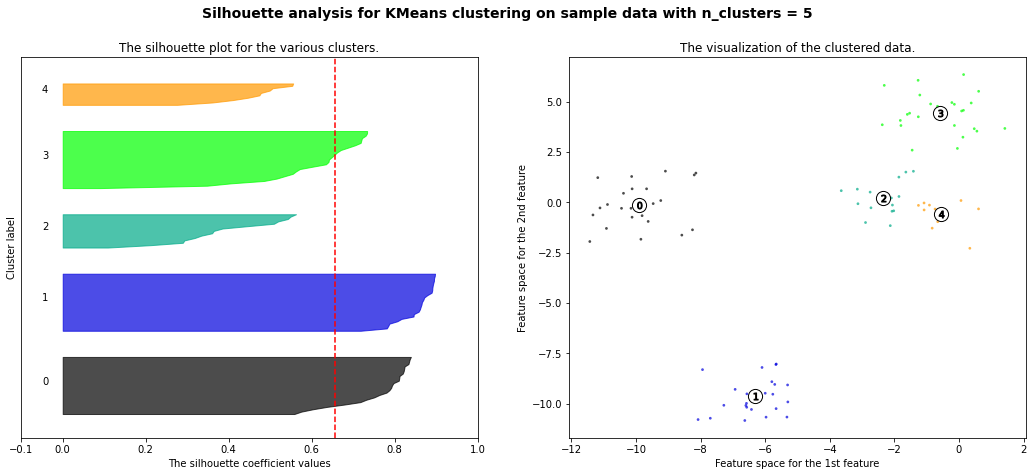

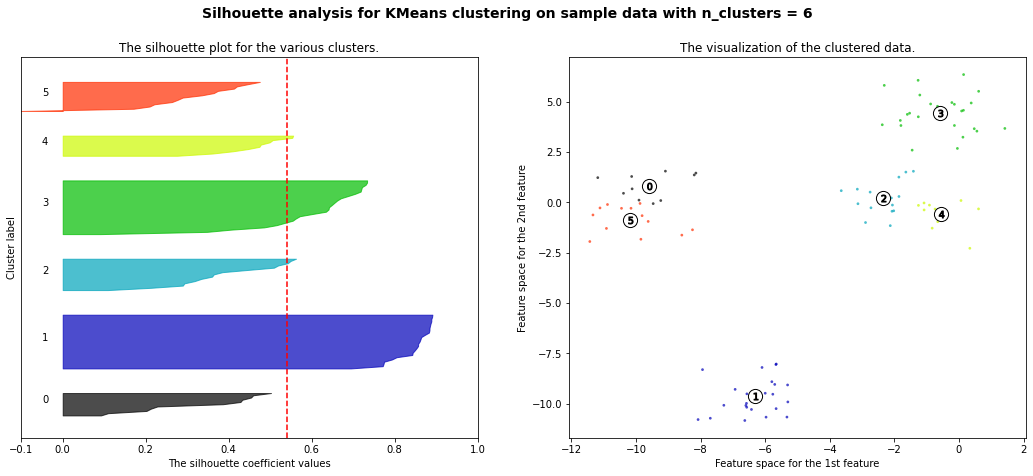

In [37]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Hierarchial Agglomerative Clustering

> Note Agglomerative is a fancy way of saying bottoms-up 

The problem with K-Means clustering is that you have to specify the number of clusters to choose.  With hierarchial clustering, you do not have to commit to a specified number of clusters.

Hierarchial clustering works by combining points that are closest together into groupings.  Then combining those groupings together. 

A common way of showing this is with a dendogram.  A dendogram shows how the points are fused together.  The points fused together at the bottom are very similar and points fused together at the top can be very different.  

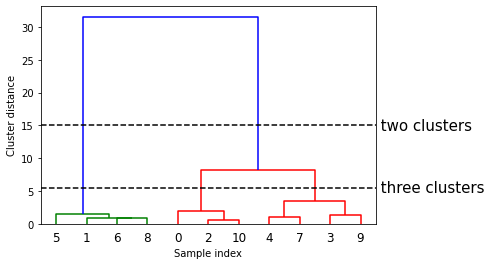

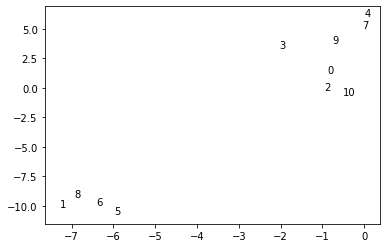

In [67]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=11, n_samples=11)
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [15, 15], '--', c='k')
ax.plot(bounds, [5.5, 5.5], '--', c='k')

ax.text(bounds[1], 15, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 5.5, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

plt.scatter(X[:, 0], X[:, 1], alpha = 0)
for counter, i in enumerate(X):
    plt.text(i[0], i[1], f'{counter}')
plt.show()

We can see that it grouped 0 and 2 together and 1, 6, and 8 together first.  We can see the process for grouping another dataset below. 

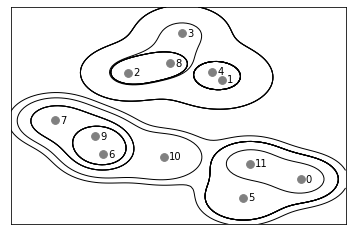

In [69]:
mglearn.plots.plot_agglomerative()

Now I am going to see how it looks with a larger dataset. 

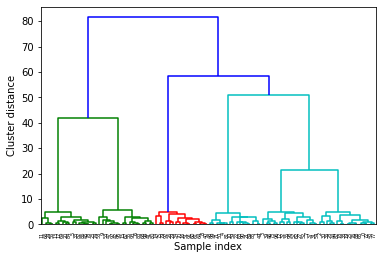

In [72]:
X, y = make_blobs(random_state=11, n_samples=100, centers = 6)

linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

It's a little hard to see, so I can only show the last part of the dendogram.  

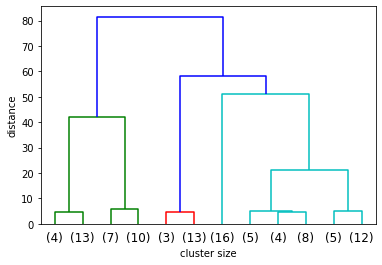

In [73]:
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

#### Compare Results of K-Means Clusters and HAC 

In [74]:
X, y = make_blobs(random_state=11, n_samples=1000, centers = 6)

For n_clusters = 2 The average silhouette_score is : 0.42273454442218367
For n_clusters = 3 The average silhouette_score is : 0.5386819594976779
For n_clusters = 4 The average silhouette_score is : 0.6307760013363154
For n_clusters = 5 The average silhouette_score is : 0.7492770283924176
For n_clusters = 6 The average silhouette_score is : 0.7502547601018824
For n_clusters = 8 The average silhouette_score is : 0.5870603692171024
For n_clusters = 10 The average silhouette_score is : 0.4825896234508158


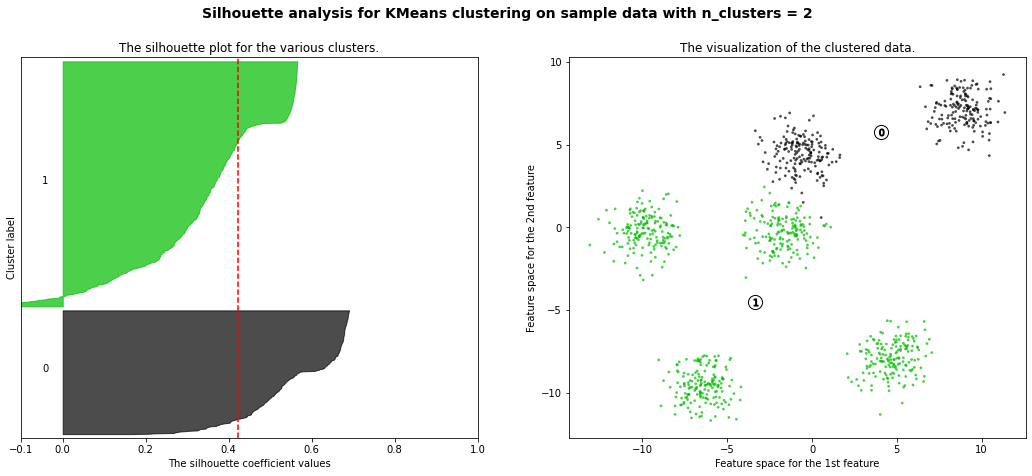

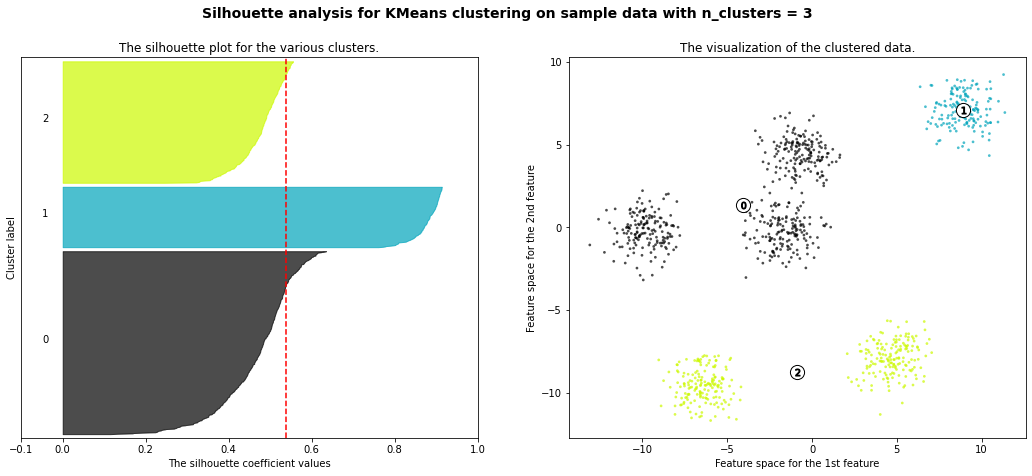

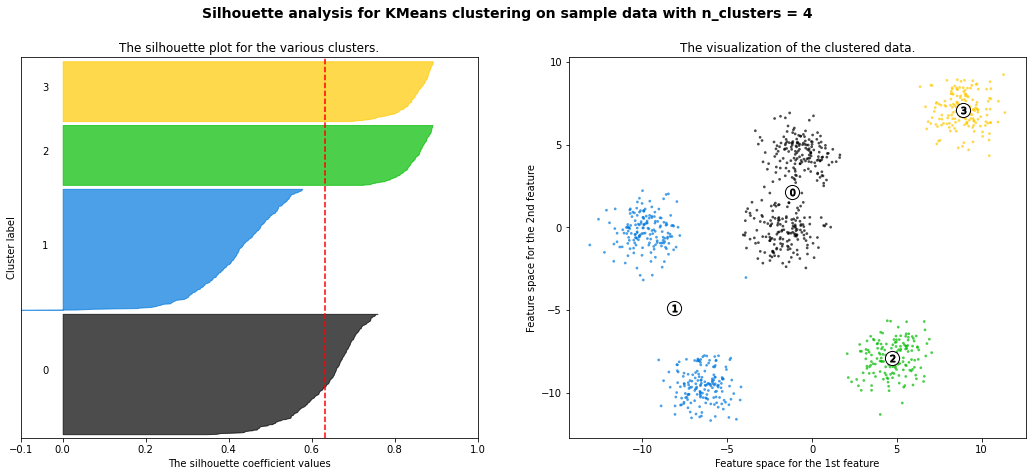

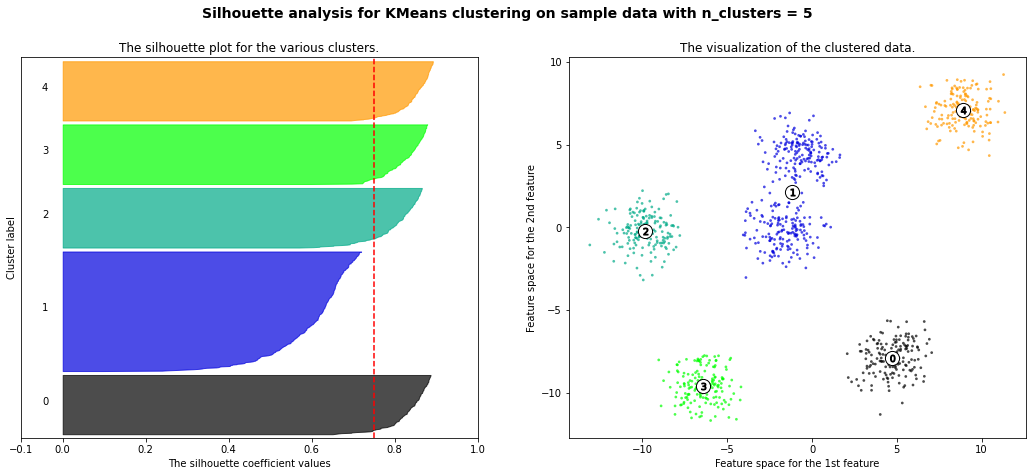

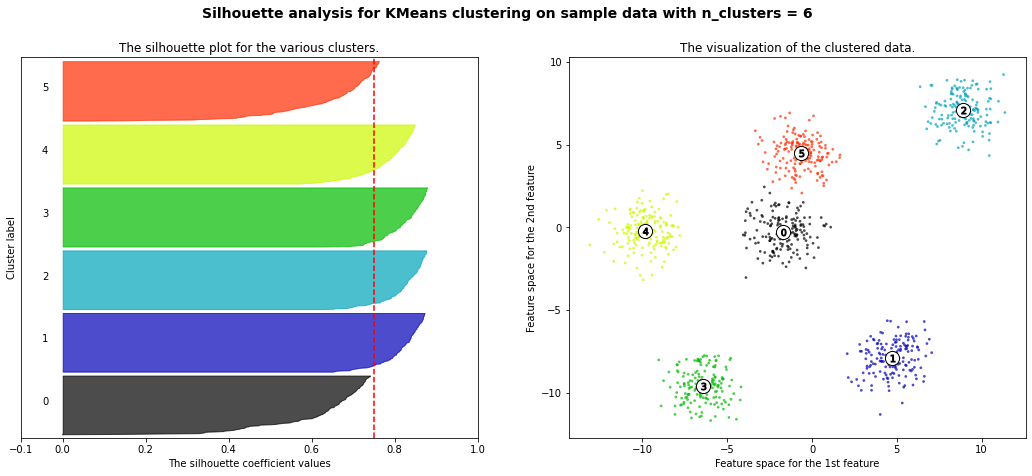

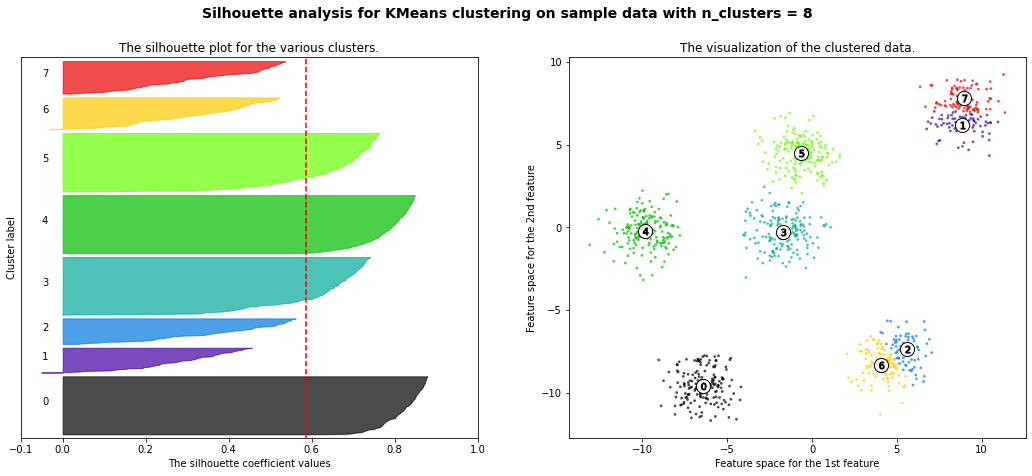

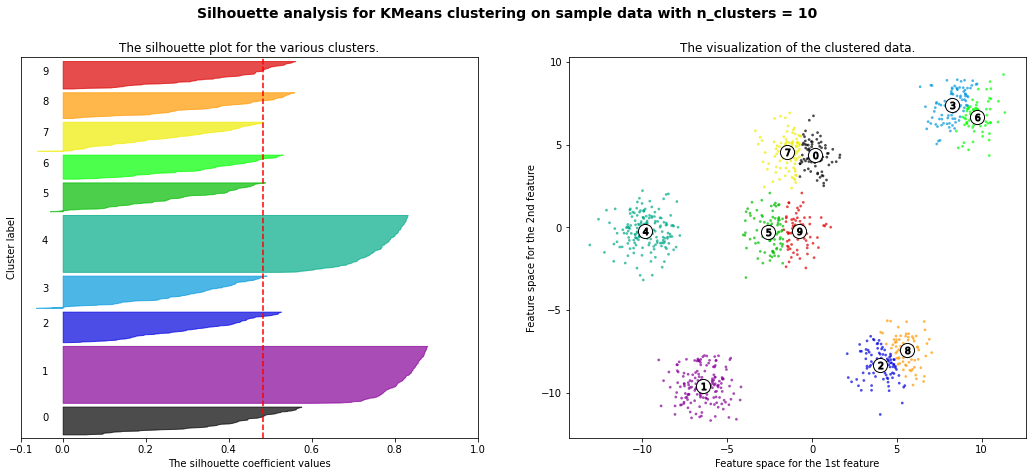

In [75]:
# first use kmeans 
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [76]:
km = KMeans(n_clusters=6)
km.fit(X)
silhouette_score(X, km.predict(X))

0.7502547601018824

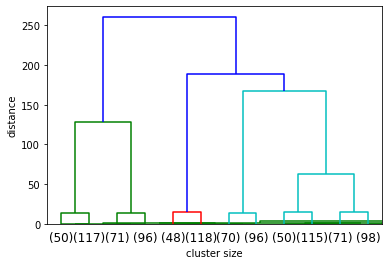

In [78]:
# HAC 
linkage_array = ward(X)
dendrogram(linkage_array)
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

In [81]:
# will try 5 and 6 clusters 
from sklearn.cluster import AgglomerativeClustering
agg_ward_6 = AgglomerativeClustering(linkage ='ward', n_clusters=6)
silhouette_score(X, agg_ward_6.fit_predict(X))

0.7497172365841086

In [83]:
agg_ward_5 = AgglomerativeClustering(linkage ='ward', n_clusters=5)
silhouette_score(X, agg_ward_5.fit_predict(X))

0.7492770283924176

All very similar scores!